In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
# Read in data
vgsales = pd.read_csv('~/Downloads/archive/vgsales.csv')


In [19]:
# Check for duplicates
vgsales.duplicated().sum()

0

In [29]:
# Check data set for nulls
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [4]:
# Replace null values with empty string
vgsales.fillna('', inplace=True)

In [5]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Text(0.5, 1.0, 'Global Sales Over Time')

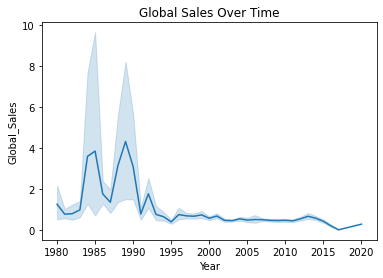

In [7]:
sns.lineplot(x='Year', y='Global_Sales',data=vgsales).set_title("Global Sales Over Time")

Text(0.5, 1.0, 'NA Sales Over Time')

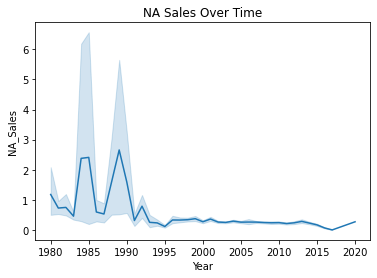

In [8]:
vgsales.head()
sns.lineplot(x='Year', y='NA_Sales',data=vgsales).set_title("NA Sales Over Time")

Text(0.5, 1.0, 'EU Sales Over Time')

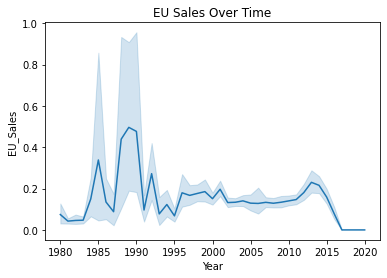

In [9]:
sns.lineplot(x='Year', y='EU_Sales',data=vgsales).set_title("EU Sales Over Time")

Text(0.5, 1.0, 'JP Sales Over Time')

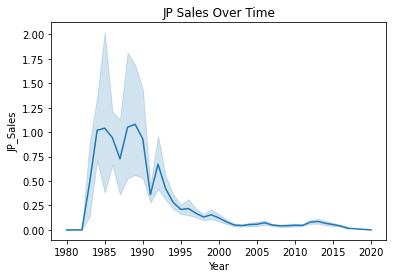

In [10]:
sns.lineplot(x='Year', y='JP_Sales',data=vgsales).set_title("JP Sales Over Time")

In [11]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [17]:
salesbyplatform = vgsales.groupby('Platform')['Global_Sales'].sum().reset_index()

In [21]:
# Shows Sales by platform in descending order 
salesbyplatform.sort_values('Global_Sales', ascending=False)

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


In [24]:
top10salesbyplatform = salesbyplatform.sort_values('Global_Sales', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Platforms By Global Sales')

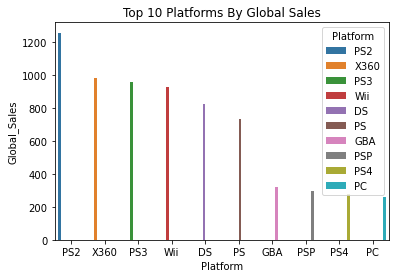

In [27]:
sns.barplot(data=top10salesbyplatform, x='Platform', y='Global_Sales',hue='Platform').set_title("Top 10 Platforms By Global Sales")

In [33]:
salesbypublisher = vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False)
salesbypublisher

,Publisher,Global_Sales
360,Nintendo,1786.56
139,Electronic Arts,1110.32
22,Activision,727.46
457,Sony Computer Entertainment,607.50
526,Ubisoft,474.72
...,...,...
468,Stainless Games,0.01
250,Inti Creates,0.01
320,Michaelsoft,0.01
133,EON Digital Entertainment,0.01


In [32]:
salesbygenre = vgsales.groupby('Genre')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False)
salesbygenre

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


Text(0.5, 1.0, 'Global Sales by Genre')

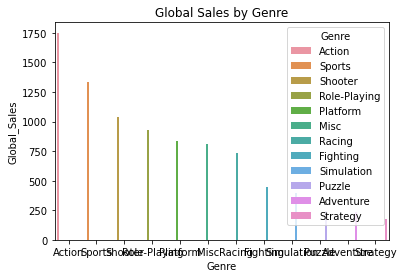

In [35]:
sns.barplot(data=salesbygenre, x='Genre', y='Global_Sales',hue='Genre').set_title("Global Sales by Genre")

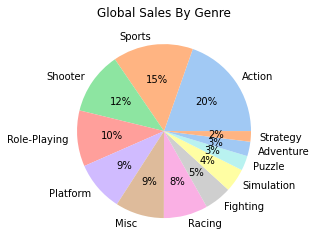

In [40]:
# Pie Chart of Global Sales By Genre

data = salesbygenre['Global_Sales']
labels = salesbygenre['Genre']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(salesbygenre.index)-1]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Global Sales By Genre')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

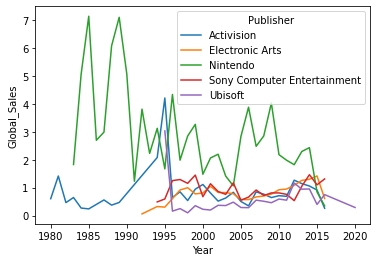

In [67]:
# Track Sales of Top 5 Publishers over Time
vgsales = pd.read_csv('~/Downloads/archive/vgsales.csv')

top5salesbypublisher = vgsales.groupby('Publisher')['Global_Sales'].sum().reset_index().sort_values('Global_Sales', ascending=False).head(5)

data = vgsales.loc[vgsales['Publisher'].isin(top5salesbypublisher['Publisher'])]
pivotdata = pd.pivot_table(data=data,values='Global_Sales', index=['Publisher', 'Year'])

sns.lineplot(data=pivotdata,x='Year',y='Global_Sales',hue='Publisher')